## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv') # reading the data in ab_data.csv into df
df.head() # printing the first five rows of the ab_data 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0] # get the total number of rows in the data frame

294478

c. The number of unique users in the dataset.

In [4]:
print(df.nunique()) # printing the number of unique values in every column

print(f'number of unique users = {df.nunique()[0]}') # printing the number of unique values user_id to get the total number of users

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64
number of unique users = 290584


d. The proportion of users converted.

In [5]:
df['converted'].mean() # getting the mean of the converted column for the data set

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df_first_nonmatching_group  = df.query("group == 'treatment' and landing_page== 'old_page'") # git all the rows with group = treatment and landing_page = old_page and save them in df_first_nonmatching_group
df_second_nonmatching_group = df.query("group == 'control' and landing_page== 'new_page'")   # git all the rows with group = control   and landing_page = new_page and save them in df_second_nonmatching_group

print(f"The number of times the new_page and treatment don't line up = {len(df_first_nonmatching_group)+ len(df_second_nonmatching_group)}")

The number of times the new_page and treatment don't line up = 3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum() # getting the number of null data

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

no missining values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

we should remove all the rows with group that does not line up with landing page

In [8]:
df2 = df.copy() # create a copy of df and save it in df2
df2 = df2.drop(df_first_nonmatching_group.index)  # remove all the rows with group = treatment and landing_page = old_page
df2 = df2.drop(df_second_nonmatching_group.index) # remove all the rows with group = control   and landing_page = new_page

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print(df2.nunique()) # printing the number of unique values in every column in df2

print(f'number of unique users in df2 = {df2.nunique()[0]}') # printing the number of unique values user_id to get the total number of users in df2

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64
number of unique users in df2 = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2_duplicated = df2[df2.duplicated(['user_id'], keep= False)] # get the duplicated user data and save them into df2_duplicated
df2_duplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
duplicated_user_id = df2_duplicated['user_id'][df2_duplicated.index[0]] # getting the id of the duplicated user and saving it in duplicated_user_id variable

print(f'the repeated user_id = {duplicated_user_id}') 

the repeated user_id = 773192


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(df2_duplicated.index[0], inplace=True) # dropping one of the duplicated user id data

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2['converted'].mean() # getting the mean for the converted column for the whole data set

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2_control = df2[df2['group'] == 'control'] # getting all the idividuals that were in the control group and saving them in df2_control data frame
df2_control['converted'].mean() # getting the mean for the converted column for people that were in control group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2_treatment = df2[df2['group'] == 'treatment'] # getting all the idividuals that were in the treatment group and saving them in df2_treatment data frame
df2_treatment['converted'].mean() # getting the mean for the converted column for people that were in treatment group

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
len(df2_treatment)/len(df2) # getting the probability that an individual received the new page (in the treatment group)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**from the above calculations we found out that half of the population received the new page and the other half received the old page and the probability for converting in the old page is 0.12 and in the new page is 0.1188 from these probabilities we can't say that the new page leads to more conversions and we may consider other factors .**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


the null hypotheses is the conversion rate of the **old page** is `bigger than or equal` the conversion rate of the **new page** **$H_{o}$** : **$p_{old}$** >= **$p_{new}$**
<br>
the alternative hypotheses is the conversion rate of the **new page** is `bigger than` the conversion rate of the **old page** **$H_{1}$** : **$p_{new}$** > **$p_{old}$***


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# under the null hypothesis, p_new and p_old both have "true" success rates equal to the **converted** success rate regardless of page 
# p_new and p_old are equal

p_new = df['converted'].mean()
p_new

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# under the null hypothesis, p_new and p_old both have "true" success rates equal to the **converted** success rate regardless of page 
# p_new and p_old are equal

p_old = df['converted'].mean()
p_old

0.11965919355605512

c. What is $n_{new}$?

In [20]:
n_new = len(df2_treatment) # get the length of df2_treatment which is numper of users recived new page
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = len(df2_control) # get the length of df2_control which is numper of users recived old page
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice(2, n_new, p = [1-p_new, p_new]) # simulating the case for n_new and gitteng it's mean
new_page_converted.mean()

0.11973711375679581

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice(2, n_old, p = [1-p_old ,p_old]) # simulating the case for n_old and gitteng it's mean
old_page_converted.mean()

0.11945014248936492

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
print(f'p_new - p_old = {new_page_converted.mean() - old_page_converted.mean()}') # getting p_new - p_old

p_new - p_old = 0.00028697126743089385


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'frequency')

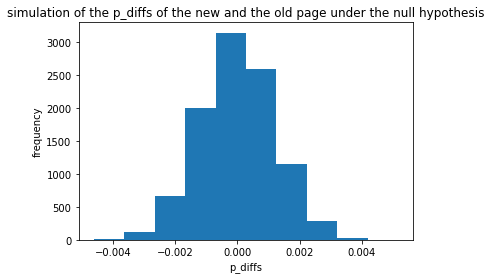

In [26]:
p_diffs_np = np.array(p_diffs) # converting p_diff from list to numpy array to visualize it

plt.hist(p_diffs_np) # creating a histogram for p_diffs
plt.title('simulation of the p_diffs of the new and the old page under the null hypothesis')
plt.xlabel('p_diffs')
plt.ylabel('frequency')


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
difference_p_new_and_p_old = df2_treatment['converted'].mean() - df2_control['converted'].mean() #getting the proportion of the p_diffs that are greater than the actual difference observed in the data set
print((difference_p_new_and_p_old < p_diffs_np).mean()) # printing the propotion of the p_diffs that is greater than the actual difference in ab_data

0.9065


Text(0, 0.5, 'frequency')

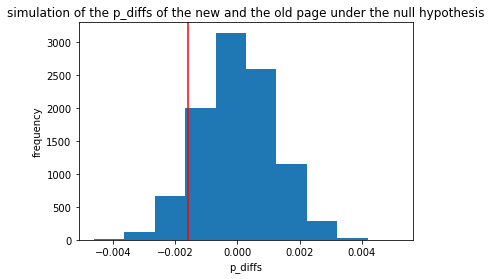

In [28]:
plt.hist(p_diffs_np) # creating a histogram for p_diffs
plt.axvline(x= difference_p_new_and_p_old, color='r') # creating a vertical line for the difference betwean p_new and p_old
plt.title('simulation of the p_diffs of the new and the old page under the null hypothesis')
plt.xlabel('p_diffs')
plt.ylabel('frequency')


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**the calculated value is called p-value which is the propotion of the p_diffs that is greater than the actual diffrence in the data set.**

**from the above value we conclude that we cann't reject the null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm
# filling the data for sm proportions_ztest
convert_old = df2_control['converted'].value_counts()[1]
convert_new = df2_treatment['converted'].value_counts()[1]
n_old = n_old
n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
# impleminting the proportions_ztest
count = [convert_old, convert_new]
nobs = [n_old, n_new]
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative= 'smaller') # as we perform a one-sided t-test alternative = smaller
stat, pval

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**the stat refers to test statistic for the z-test and the pval refers to p-value for the z-test.**
<br>
**the stat is less than 0.95 so we conclude that we can't reject the Null hypothesis which is the same conclusion from the last part and the calculated values is nearly the same as we calculated in the binomial distribution method**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We will use logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = 1 # creating dummy variable for intercept
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment'] # creating the ab_page column

df2.head() 

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']]) # implementing the logistic regression model on the dataset 
results   = logit_mod.fit() # fiting the model and saving the output in results

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary() # pronting the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        04:18:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value in the ab_page = 0.19 and it differ from the value form part 2 as**

**the hypotheses in part 2 is :**
<br>
**$H_{o}$** : **$p_{old}$** $\geq$ **$p_{new}$**
<br>
**$H_{1}$** : **$p_{new}$** > **$p_{old}$**
<br>
**but in the logistic regression model is:**
<br>  
**$H_{1}$** : **$p_{new}$** $\neq$ **$p_{old}$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**adding other factors will be a good idea as it will increase the accuracy of the model and may lead to changing the confidence intervals but this will take more computational power and also could change our analysis depending on the factors added also could result in multicollinearity which happens when three or more variables are highly correlated which results in coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data also we could have a Simpson’s Paradox in which a trend appears in several groups of data but disappears or reverses when the groups are combined.**

refrences : [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity), [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox), 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [35]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
df_new['country'].value_counts() # printing the value counts in the country feature

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [37]:
df_new[['US', 'CA', 'UK']] = pd.get_dummies(df_new['country'])[['US', 'CA', 'UK']] # Create the dummy variables for the model

In [38]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,CA,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1


In [39]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK']]) # impleminting the logstic regression model
results = logit_mod.fit() # fitting the model and saving the output in results

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [40]:
results.summary() # printing the summary of the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:               1.521e-05
Time:                        04:18:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

**from the summary there is no significant result of adding the country feature and we fail to reject the Null hypothesis as the p-value of the countries is hiegher than the α level.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
df_new['ab_US'] = df_new['ab_page'] * df_new['US'] # Create new column for ab_us
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK'] # Create new column for ab_uk
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,CA,UK,ab_US,ab_UK
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1


In [42]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'ab_US', 'ab_UK']]) # impleminting the logstic regression model
results = logit_mod.fit() # fitting the model and saving the output in results

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:               3.482e-05
Time:                        04:18:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**again we fail to reject the null hypothesis as the interactions of page and countries doesn't give any significant p-values  and our analysis conclusion is to keep the old page as the new page doesn't provide any significant value**

## conclusion :
- we fail to reject the null hypothesis 
- keeping the old page is a good idea in our situation as the new page doesn't give any significant change in the results and will it will be overwhelming to implement a new page that doesn't give a significant change